In [2]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('C:/Users/user/OneDrive/바탕 화면/과제/top100/genre.csv',parse_dates=['weekID'])
df

,song,weekID,tempo,spotify_genre,genre
0,Automatic Lover (Call For Love),1995-10-21,132.992,"['bubblegum dance', 'diva house', 'eurodance',...",dance
1,"After 12, Before 6",1997-08-23,118.040,"['new jack swing', 'r&b']",r&b
2,Bag Lady,2000-08-19,151.181,"['funk', 'hip hop', 'neo soul', 'r&b', 'soul',...",hip pop
3,Because I Got High,2001-08-18,165.982,"['gangster rap', 'hip hop', 'rap']",hip pop
4,All You Wanted,2002-02-23,96.103,"['candy pop', 'dance pop', 'lilith', 'neo mell...",dance
...,...,...,...,...,...
995,Alive,1972-11-18,128.002,"['big room', 'brostep', 'catstep', 'dance pop'...",dance
996,Alive,1972-11-18,103.564,"['adult standards', 'disco', 'mellow gold', 's...",adult standards
997,A Very Special Love Song,1974-02-23,76.482,"['arkansas country', 'country', 'country rock'...",country
998,Alive Again,1978-10-21,125.616,"['adult standards', 'album rock', 'classic roc...",folk


In [5]:
# '날짜' 열을 Datetime 형식으로 변환
# 월별로 묶어서 카운트
df['month'] = df['weekID'].dt.month
monthly_counts = df.groupby(df['weekID'].dt.month).size()

In [10]:
df.loc[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5), 'season'] = 'Spring'
df.loc[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8), 'season'] = 'Summer'
df.loc[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11), 'season'] = 'Fall'
df.loc[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2), 'season'] = 'Winter'
df

,song,weekID,tempo,spotify_genre,genre,month,season
0,Automatic Lover (Call For Love),1995-10-21,132.992,"['bubblegum dance', 'diva house', 'eurodance',...",dance,10,Fall
1,"After 12, Before 6",1997-08-23,118.040,"['new jack swing', 'r&b']",r&b,8,Summer
2,Bag Lady,2000-08-19,151.181,"['funk', 'hip hop', 'neo soul', 'r&b', 'soul',...",hip pop,8,Summer
3,Because I Got High,2001-08-18,165.982,"['gangster rap', 'hip hop', 'rap']",hip pop,8,Summer
4,All You Wanted,2002-02-23,96.103,"['candy pop', 'dance pop', 'lilith', 'neo mell...",dance,2,Winter
...,...,...,...,...,...,...,...
995,Alive,1972-11-18,128.002,"['big room', 'brostep', 'catstep', 'dance pop'...",dance,11,Fall
996,Alive,1972-11-18,103.564,"['adult standards', 'disco', 'mellow gold', 's...",adult standards,11,Fall
997,A Very Special Love Song,1974-02-23,76.482,"['arkansas country', 'country', 'country rock'...",country,2,Winter
998,Alive Again,1978-10-21,125.616,"['adult standards', 'album rock', 'classic roc...",folk,10,Fall


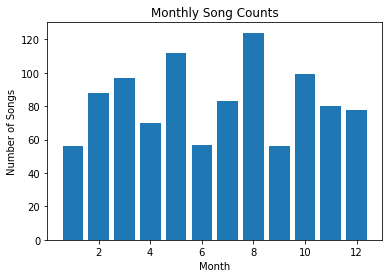

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 막대 그래프
plt.bar(monthly_counts.index, monthly_counts.values)

# 축 및 레이블 설정
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.title('Monthly Song Counts')

# 그래프 표시
plt.show()

In [12]:
numeric_rows = df[pd.to_numeric(df['tempo'], errors='coerce').notna()]
print(numeric_rows)

                                song     weekID    tempo  \
0    Automatic Lover (Call For Love) 1995-10-21  132.992   
1                 After 12, Before 6 1997-08-23  118.040   
2                           Bag Lady 2000-08-19  151.181   
3                 Because I Got High 2001-08-18  165.982   
4                     All You Wanted 2002-02-23   96.103   
..                               ...        ...      ...   
995                            Alive 1972-11-18  128.002   
996                            Alive 1972-11-18  103.564   
997         A Very Special Love Song 1974-02-23   76.482   
998                      Alive Again 1978-10-21  125.616   
999                 Anything For You 1988-03-12  143.798   

                                         spotify_genre            genre  \
0    ['bubblegum dance', 'diva house', 'eurodance',...            dance   
1                            ['new jack swing', 'r&b']              r&b   
2    ['funk', 'hip hop', 'neo soul', 'r&b', 'soul',...

In [13]:
numeric_rows.loc[numeric_rows['tempo'] <= 90, 'tempo1'] = 'slow'
numeric_rows.loc[(numeric_rows['tempo'] > 90) & (numeric_rows['tempo'] <= 130), 'tempo1'] = 'mid'
numeric_rows.loc[numeric_rows['tempo'] > 130, 'tempo1'] = 'fast'

In [7]:
numeric_rows

,song,weekID,tempo,spotify_genre,genre,tempo1
0,Automatic Lover (Call For Love),1995-10-21,132.992,"['bubblegum dance', 'diva house', 'eurodance',...",dance,fast
1,"After 12, Before 6",1997-08-23,118.040,"['new jack swing', 'r&b']",r&b,mid
2,Bag Lady,2000-08-19,151.181,"['funk', 'hip hop', 'neo soul', 'r&b', 'soul',...",hip pop,fast
3,Because I Got High,2001-08-18,165.982,"['gangster rap', 'hip hop', 'rap']",hip pop,fast
4,All You Wanted,2002-02-23,96.103,"['candy pop', 'dance pop', 'lilith', 'neo mell...",dance,mid
...,...,...,...,...,...,...
995,Alive,1972-11-18,128.002,"['big room', 'brostep', 'catstep', 'dance pop'...",dance,mid
996,Alive,1972-11-18,103.564,"['adult standards', 'disco', 'mellow gold', 's...",adult standards,mid
997,A Very Special Love Song,1974-02-23,76.482,"['arkansas country', 'country', 'country rock'...",country,slow
998,Alive Again,1978-10-21,125.616,"['adult standards', 'album rock', 'classic roc...",folk,mid


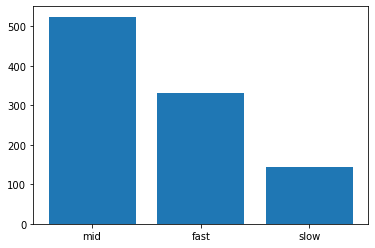

In [14]:

words = numeric_rows['tempo1'].value_counts().index
counts = numeric_rows['tempo1'].value_counts().values

# 그래프 그리기
plt.bar(words, counts)
plt.show()

In [15]:
df['Month'] = df['weekID'].dt.month

In [17]:
season_genre_counts = df.groupby(['season', 'genre']).size().unstack(fill_value=0)

# 계절season_genre_counts별로 가장 많이 등장한 장르 찾기
season_genre_counts

genre,adult standards,blues,christian,country,dance,folk,funk,hip pop,house,indie,jazz,metal,motown,pop,punk,r&b,기타
season,,,,,,,,,,,,,,,,,
Fall,9,4,0,12,57,8,5,5,1,0,5,8,1,72,4,1,43
Spring,10,4,0,12,74,6,7,8,1,0,13,7,0,100,0,0,37
Summer,10,4,0,14,73,4,9,8,2,0,7,4,1,91,2,2,33
Winter,5,5,1,9,54,5,3,6,0,1,4,3,0,94,2,1,29


<Figure size 864x576 with 0 Axes>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)


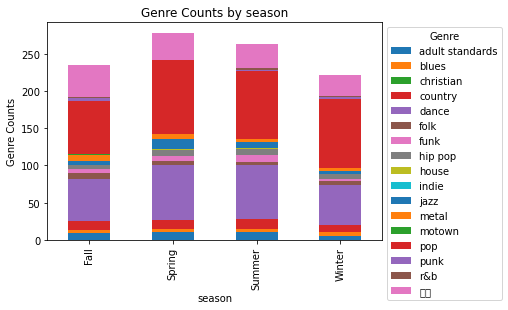

In [18]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
season_genre_counts.plot(kind='bar', stacked=True)
plt.xlabel('season')
plt.ylabel('Genre Counts')
plt.title('Genre Counts by season')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

In [23]:
numeric_rows['Month'] = numeric_rows['weekID'].dt.month
season_tempo_counts = numeric_rows.groupby(['season', 'tempo1']).size().unstack(fill_value=0)
season_tempo_counts

tempo1,fast,mid,slow
season,,,
Fall,73,132,30
Spring,95,148,36
Summer,91,136,37
Winter,73,108,41


In [24]:
# 행 단위로 비율 계산
season_tempo_percentages = season_tempo_counts.div(season_tempo_counts.sum(axis=1), axis=0) * 100

# 결과 출력
print(season_tempo_percentages)

tempo1       fast        mid       slow
season                                 
Fall    31.063830  56.170213  12.765957
Spring  34.050179  53.046595  12.903226
Summer  34.469697  51.515152  14.015152
Winter  32.882883  48.648649  18.468468


<Figure size 864x576 with 0 Axes>

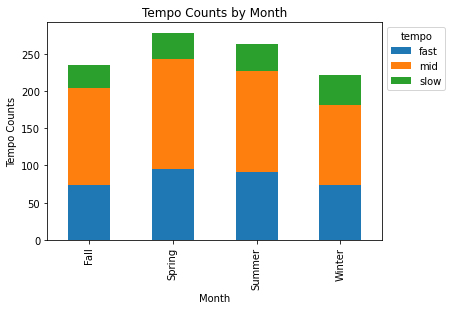

In [21]:
plt.figure(figsize=(12, 8))
season_tempo_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Tempo Counts')
plt.title('Tempo Counts by Month')
plt.legend(title='tempo', bbox_to_anchor=(1, 1))
plt.show()